# Usage


Here, we present the standard usage of the model. 

First we will present the Simple Climate Model usage and next the basic routine to create a game.

## Simple Climate Model usage

As seen previously, the Simple Climate Model (SCM) is composed of 3 part. The Carbon Cycle (CC), the Radiative Forcing (RF) equation and the Temperature Dynamique (TD). We will present them in this order.

### Carbon Cycle

The standard way to modelize the carbon cycle is to call a Carbon Cycle class. 

In [1]:
from models.geophysic_models.carbon_cycle_models import *

# Choose of the Carbon Cycle
carbon_cycle = Carbon_JOOS()

print('Model\'s name:', carbon_cycle.name)
print('Initial state:' , carbon_cycle.initial_state)
print('Transition Matrix:\n', carbon_cycle.Ac)
print()

# Given a state and emission per years
state=carbon_cycle.initial_state
emission = 50
print('Initial Gt of carbon in the atmosphere:', carbon_cycle.atmospheric_carbon(state))
print('Gt of carbon in the atmosphere after five years for emission of {} Gt CO2 per years:'.format(emission), carbon_cycle.five_years_atmospheric_carbon(emission, state))

Model's name: Joos-et-al
Initial state: [139.1  90.2  29.2   4.2]
Transition Matrix:
 [[1.     0.     0.     0.    ]
 [0.     0.9975 0.     0.    ]
 [0.     0.     0.973  0.    ]
 [0.     0.     0.     0.7927]]

Initial Gt of carbon in the atmosphere: 854.8399999999999
Gt of carbon in the atmosphere after five years for emission of 50 Gt CO2 per years: 907.0553351921237


### Radiative Forcing

In [2]:
from models.geophysic_models.radiative_forcing import radiative_forcing_function

Gt_carbon_in_atmosphere = 900

print('Radiative Forcing for {} Gt of carbon in atmosphere:'.format(Gt_carbon_in_atmosphere),radiative_forcing_function(Gt_carbon_in_atmosphere))

Radiative Forcing for 900 Gt of carbon in atmosphere: 2.2347507457569393


### Temperature Dynamic 

In [3]:
from models.geophysic_models.temperature_dynamic_model import *

# Choose of the temperature dynamic
temperature_dynamic = Temp_Discret_Geoffroy()

print('Model\'s name:', temperature_dynamic.name)
print('Initial state:' , temperature_dynamic.initial_state)
print('Transition Matrix:\n', temperature_dynamic.At)
print()

# Given a state and emission per years
state=temperature_dynamic.initial_state
radiative_forcing = 3
print('Initial globale atmospheric temperature varitation from 1750:', temperature_dynamic.atmospheric_temperature(state))
print('Global atmospheric temperature variation from 1750 after five years for a radiative forcing of {} W.m² per years:'.format(radiative_forcing), temperature_dynamic.five_years_atmospheric_temperature(radiative_forcing, state))

Model's name: Geoffroy-et-al.
Initial state: [1.01   0.0068]
Transition Matrix:
 [[0.72191781 0.1       ]
 [0.00688679 1.00688679]]

Initial globale atmospheric temperature varitation from 1750: 1.01
Global atmospheric temperature variation from 1750 after five years for a radiative forcing of 3 W.m² per years: 1.3883017700459135


### Simple Climate Model

In [4]:
from models.geophysic_models.climate_model import Simple_Climate_Model

scm = Simple_Climate_Model(carbon_cycle, temperature_dynamic)

print('Initial atmospheric Gt of carbon of the SCM:',scm.atmospheric_carbon)
print('Initial atmospheric temperature of the SCM:',scm.atmospheric_temp)
print()

emission = 50 

# If we want only the temperature without remebering it after
print('Global atmospheric temperature variation from 1750 after five years for emission of {} Gt CO2 per years:'.format(emission),
        scm.five_years_atmospheric_temp(emission, exogeneous_emission=0, exogeneous_radiative_forcing=0))

print('Atmospheric temperature of the SCM:', scm.atmospheric_temp)

# If we want remebering it after
# 5 years
scm.five_years_cycle_deep(emission, exogeneous_emission=0, exogeneous_radiative_forcing=0)
print('Global atmospheric temperature variation from 1750 after five years for emission of {} Gt CO2 per years:'.format(emission),
        scm.atmospheric_temp)
# 5 + 5 = 10 years
scm.five_years_cycle_deep(emission, exogeneous_emission=0, exogeneous_radiative_forcing=0)
print('Global atmospheric temperature variation from 1750 after ten years for emission of {} Gt CO2 per years:'.format(emission),
        scm.atmospheric_temp)

Initial atmospheric Gt of carbon of the SCM: 854.8399999999999
Initial atmospheric temperature of the SCM: 1.01

Global atmospheric temperature variation from 1750 after five years for emission of 50 Gt CO2 per years: 1.1154548887208628
Atmospheric temperature of the SCM: 1.01
Global atmospheric temperature variation from 1750 after five years for emission of 50 Gt CO2 per years: 1.1154548887208628
Global atmospheric temperature variation from 1750 after ten years for emission of 50 Gt CO2 per years: 1.2487777794650823


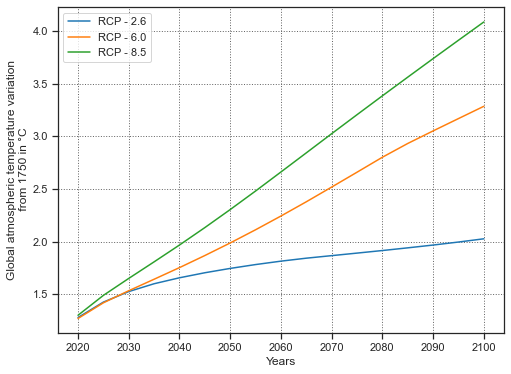

In [5]:
import pandas as pd

# Take the RCP 8.5 as Gt of Carbon per years
data = pd.read_csv('data/rcp_data.csv')
YEARS = data.keys()[8:].to_numpy(int)
RCP_26 = data.loc[data['Scenario'] == 'RCP-2.6'].to_numpy()[0][8:] * (1/co2_to_C)
RCP_60 = data.loc[data['Scenario'] == 'RCP-6.0'].to_numpy()[0][8:] * (1/co2_to_C)
RCP_85 = data.loc[data['Scenario'] == 'RCP-8.5'].to_numpy()[0][8:] * (1/co2_to_C)

scm = Simple_Climate_Model(carbon_cycle, temperature_dynamic)

temp_RCP85 = []
for emission in RCP_85:
    scm.five_years_cycle_deep(emission)
    temp_RCP85.append(scm.atmospheric_temp)

# We reset the SCM between two scenario
scm.reset()

temp_RCP26 = []
for emission in RCP_26:
    scm.five_years_cycle_deep(emission)
    temp_RCP26.append(scm.atmospheric_temp)

scm.reset()

temp_RCP60 = []
for emission in RCP_60:
    scm.five_years_cycle_deep(emission)
    temp_RCP60.append(scm.atmospheric_temp)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context("notebook")

plt.figure(figsize=(8,6))
plt.plot(YEARS, temp_RCP26, label='RCP - 2.6')
plt.plot(YEARS, temp_RCP60, label='RCP - 6.0')
plt.plot(YEARS, temp_RCP85, label='RCP - 8.5')
plt.xlabel('Years')
plt.ylabel('Global atmospheric temperature variation\n from 1750 in °C')
plt.legend()
plt.show()


## Game Theory model

### Parameterize the game

The parameters of the game are in the file parameter.py, for chaging those parameters you must do it in the parameters.py file.

#### General parameters

In [6]:
from parameters import *

print('Number of players:', N)
print('Initial year:', FIRST_YEAR)
print('Final year:', FINAL_YEAR)
print('Duration of a game:', STEP)

Number of players: 6
Initial year: 2020
Final year: 2100
Duration of a game: 5


#### Climate parameters

In [7]:
print('Carbon cycle of the game:', CARBON_MODEL.name)
print('Temperature dynamic of the game:', TEMPERATURE_MODEL.name)

Carbon cycle of the game: Joos-et-al
Temperature dynamic of the game: Geoffroy-et-al.


#### Players parameters

The action set of player 0 is [ 0.   11.47]
The name of player 0 is player 0
The temperature multiplier for player 0 is 1.4035140900000003
The initial GDP of player 0 is 14.63
The default benefit function is 


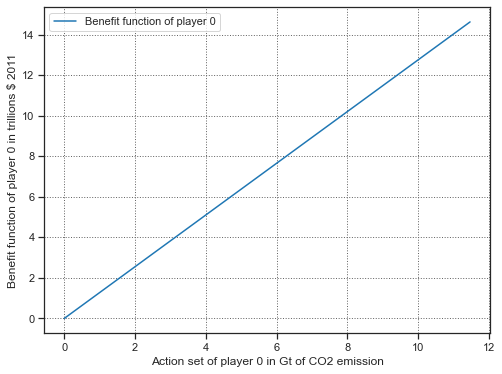

The default damage function is 


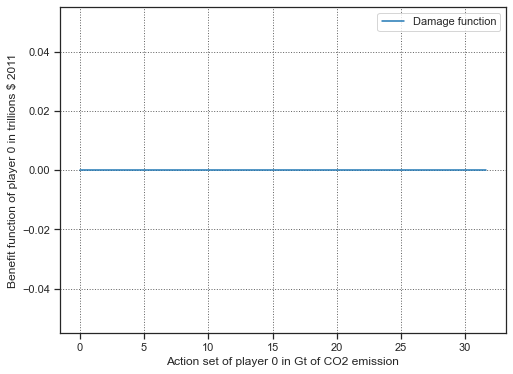

In [8]:
indice = 0

print('The action set of player {} is'.format(indice), ACTION_SETS[indice])
print('The name of player {} is'.format(indice), NAMES[indice])
print('The temperature multiplier for player {} is'.format(indice), DELTAS[indice])
print('The initial GDP of player {} is'.format(indice), GDP_MAX[indice])
print('The default benefit function is ')

x = np.linspace(*ACTION_SETS[indice],50, endpoint=True)
plt.figure(figsize=(8,6))
plt.plot(x, BENEFITS[indice](GDP_MAX[indice], ACTION_SETS[indice][1], PERCENTAGES_GREEN[indice])(x), label ='Benefit function of player {}'.format(indice))
plt.xlabel('Action set of player {} in Gt of CO2 emission'.format(indice))
plt.ylabel('Benefit function of player {} in trillions \$ 2011'.format(indice))
plt.legend()
plt.show()

print('The default damage function is ')

xx = np.sum(ACTION_SETS, axis=0)
x = np.linspace(xx[0],xx[1],50, endpoint=True)
plt.figure(figsize=(8,6))
plt.plot(x, DAMAGE(x, scm= SCM, gdp_max=GDP_MAX[indice]), label = 'Damage function')
plt.xlabel('Action set of player {} in Gt of CO2 emission'.format(indice))
plt.ylabel('Benefit function of player {} in trillions \$ 2011'.format(indice))
plt.legend()
plt.show()

### Create a list of player

In [9]:
from models.game import create_players

names = ['China', 'USA', 'EU', 'India', 'Russia', 'other Asia']
damage = damage_polynome([0,0,100])
players = create_players(list_of_names = names, 
                    list_action_sets = ACTION_SETS,
                    list_benefit_functions = BENEFITS_CONCAVE,
                    list_GDP_initial = GDP_MAX,
                    damage_function  = damage,
                    alpha = ALPHA,
                    list_deltas = DELTAS,
                    list_coef_increase_co2 = INCREASE_COEF_CO2_RATIO,
                    list_percentage_green = PERCENTAGES_GREEN,
                    )



### Create a game

In [10]:
from models.game import Game
game = Game(players)

Utilities


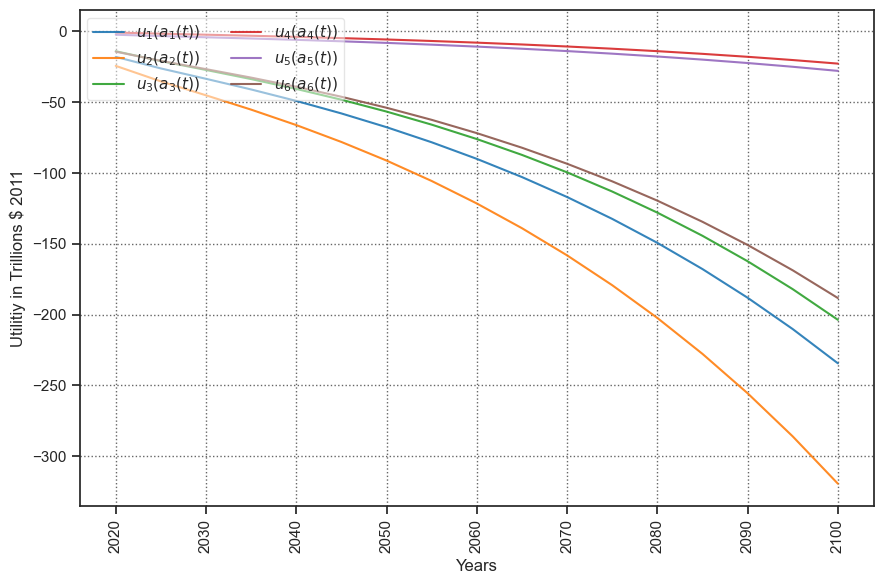

Nash equilibrium action profile


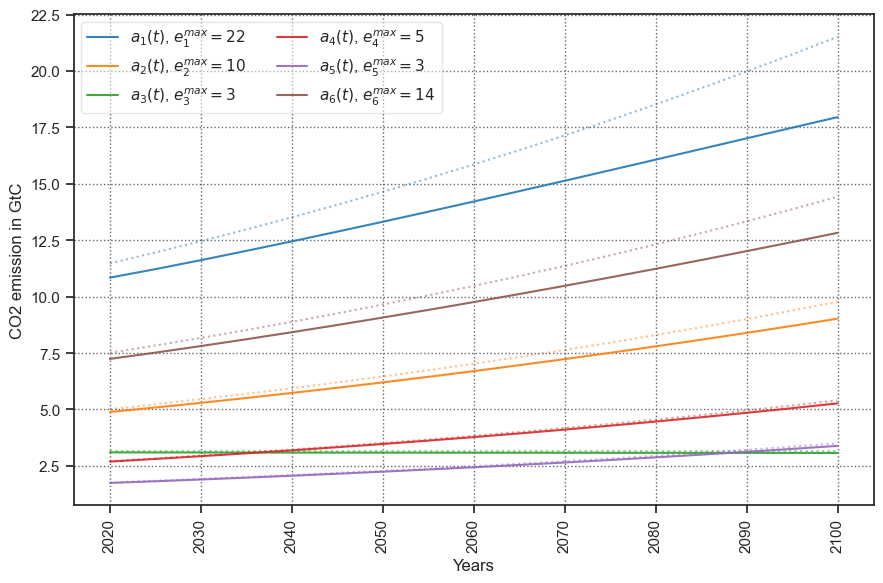

Utilities


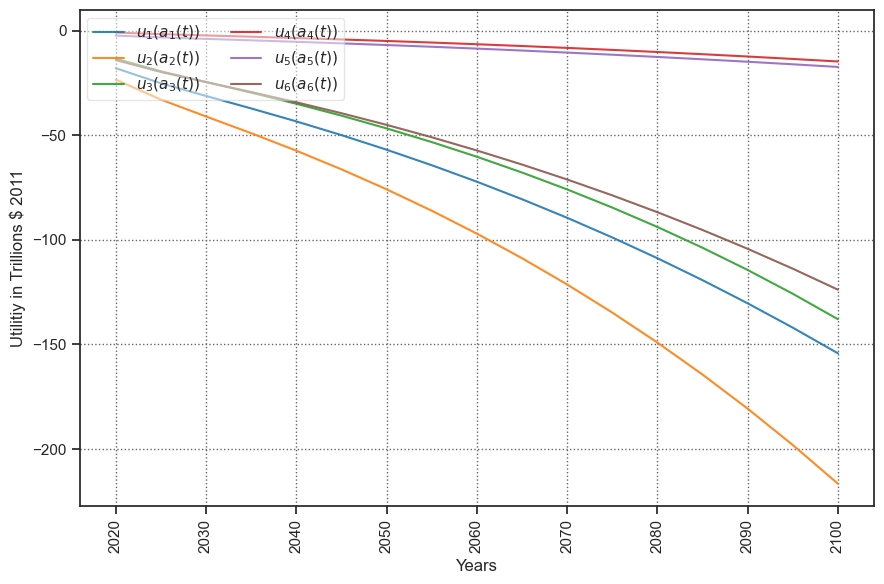

Social Optimum action profile


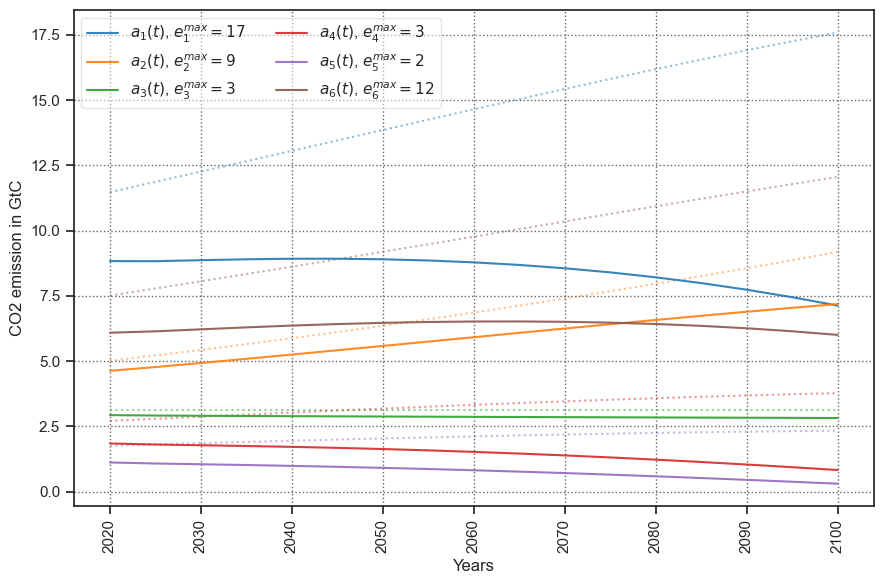

Temperatures


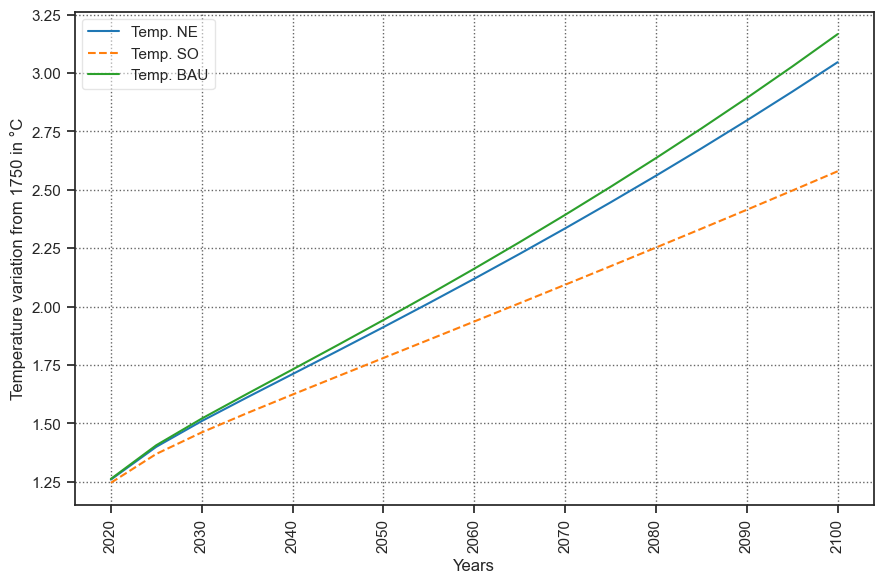

All action profiles


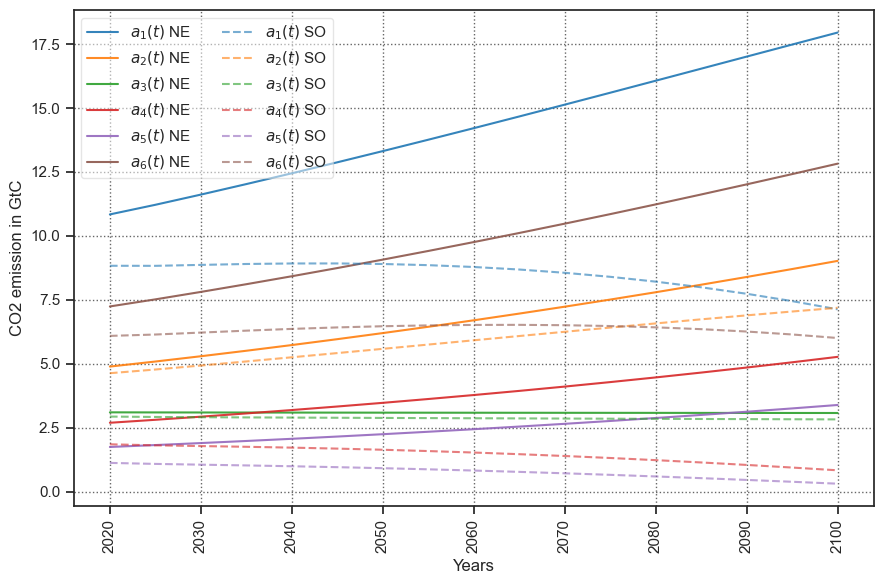

All utilities profiles


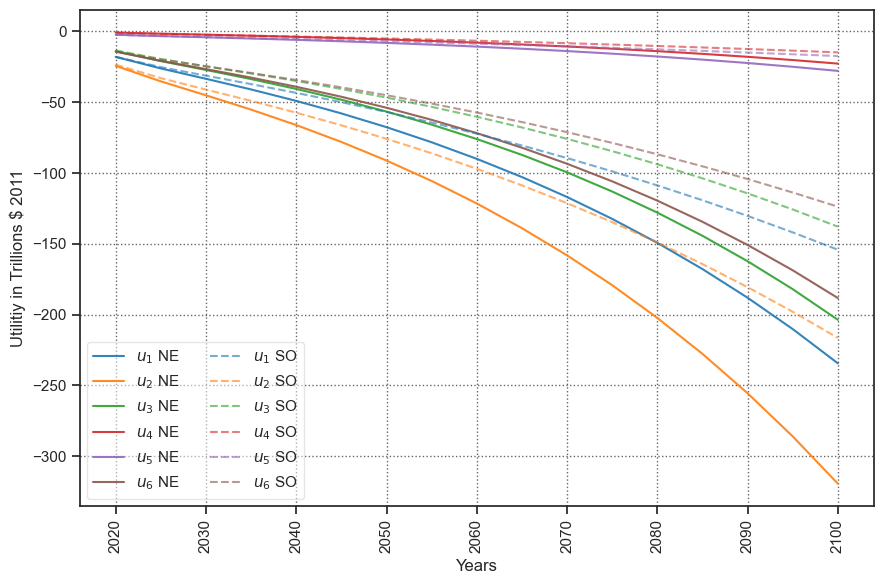

In [11]:
from plot_function import * 
plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=(9,6), name='')